## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

ImportError: No module named 'google.colab'

## Define Libraries and Project Folders

In [5]:
import h5py
import numpy as np
# import pandas as pd
path = 'gdrive/Team Drives/ML/'

## Extract Data From NYU .Mat File

In [0]:
def NYU_extract ():
    with h5py.File(path+'nyu_depth_v2_labeled.mat','r') as nyu_raw:
        NYU = dict()
        NYU['images'] = np.array(nyu_raw["images"][:])
        NYU['images'] = np.transpose(NYU['images'], [0, 3, 2, 1])
        NYU['depths'] = np.array(nyu_raw["depths"][:])
        NYU['depths'] = np.transpose(NYU['depths'], [0, 2, 1])
        NYU['depths'] = NYU['depths'].reshape(NYU['depths'].shape[0],NYU['depths'].shape[1],NYU['depths'].shape[2],1)
        return NYU

In [6]:
def NYU_extract ():
    with np.load('nyu_compressed_1.npz') as nyu_raw:
        data = dict()
        data['images'] = nyu_raw['images']/255
        data['depths'] = nyu_raw['depths']
        return data

In [7]:
data = NYU_extract()

In [24]:
data['images'].shape

(1449, 480, 640, 3)

In [29]:
data['depths'].shape

(1449, 480, 640, 1)

## Visualize Input Data

In [0]:
import matplotlib.pyplot as plt

In [0]:
data['depths_forplot'] = data['depths'].reshape(data['depths'].shape[0],data['depths'].shape[1],data['depths'].shape[2])

In [34]:
data['depths_forplot'].shape

(1449, 480, 640)

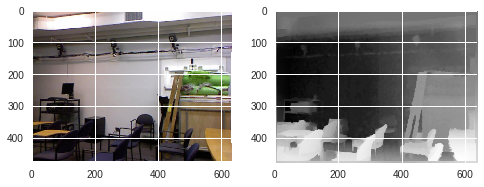

In [35]:
plt.subplot(121)
plt.imshow(data['images'][5])
plt.subplot(122)
plt.imshow(data['depths_forplot'][5])